In [51]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df_train=pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')


In [53]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
df_train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:
df_train=pd.read_csv('./house-prices-advanced-regression-techniques/train.csv', index_col='Id')

In [57]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 2. Feature selections

In [59]:
features = ['LotArea', 'YearBuilt', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

## 3. Splitting dataset into X and y

In [60]:
X = df_train[features] 
y = df_train['SalePrice']

In [61]:
X.head()

,LotArea,YearBuilt,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,
1,8450,2003,2,3,8
2,9600,1976,2,3,6
3,11250,2001,2,3,6
4,9550,1915,1,3,7
5,14260,2000,2,4,9


In [62]:
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

## 4. Data Preprocessing

In [63]:
df_train[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(5)
memory usage: 68.4 KB


In [64]:
for col in df_train[features].columns:
    missing_data = df_train[col].isna().sum()
    print(f'{col}:{missing_data}')

LotArea:0
YearBuilt:0
FullBath:0
BedroomAbvGr:0
TotRmsAbvGrd:0


### 5. Spliting dataset into the Training set and Test set

In [65]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [66]:
X_train

,LotArea,YearBuilt,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,
255,8400,1957,1,3,5
1067,7837,1993,2,3,7
639,8777,1910,1,2,4
800,7200,1937,1,3,7
381,5000,1924,2,3,6
...,...,...,...,...,...
1096,9317,2006,2,3,6
1131,7804,1928,2,4,7
1295,8172,1955,1,2,5


In [67]:
y_train

Id
255     145000
1067    178000
639      85000
800     175000
381     127000
         ...  
1096    176432
1131    135000
1295    115000
861     189950
1127    174000
Name: SalePrice, Length: 1168, dtype: int64

### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_df = scaler.fit_transform(X_train)

In [69]:
X_train_scaled_df

array([[-0.21289571, -0.45546896, -1.05556573,  0.13621832, -0.96456591],
       [-0.26524463,  0.71860895,  0.7736639 ,  0.13621832,  0.27075534],
       [-0.17784146, -1.98829291, -1.05556573, -1.10677385, -1.58222654],
       ...,
       [-0.23409563, -0.52069551, -1.05556573, -1.10677385, -0.96456591],
       [-0.28337613, -1.72738671, -1.05556573,  0.13621832,  0.27075534],
       [-0.65139925,  1.17519481,  0.7736639 , -1.10677385,  0.27075534]])

In [70]:
X_test_scaled = scaler.transform(X_test)

In [71]:
X_test_scaled

array([[-0.21159396, -0.25978931, -1.05556573,  0.13621832, -0.34690528],
       [ 0.14564323,  0.75122223,  0.7736639 ,  0.13621832,  1.50607659],
       [-0.16082574, -1.43386723, -1.05556573, -1.10677385, -0.96456591],
       ...,
       [-0.23158511,  1.10996826,  0.7736639 ,  0.13621832,  0.27075534],
       [-0.14929596, -1.00989465, -1.05556573,  1.37921049,  0.27075534],
       [-0.2389307 , -0.03149638, -1.05556573,  0.13621832, -0.96456591]])

In [72]:
# Convert scalled arrays back to dataframe for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled_df, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_df.head()

,LotArea,YearBuilt,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,-0.212896,-0.455469,-1.055566,0.136218,-0.964566
1,-0.265245,0.718609,0.773664,0.136218,0.270755
2,-0.177841,-1.988293,-1.055566,-1.106774,-1.582227
3,-0.324474,-1.107734,-1.055566,0.136218,0.270755
4,-0.529035,-1.531707,0.773664,0.136218,-0.346905


In [73]:
X_test_scaled.head()

,LotArea,YearBuilt,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,-0.211594,-0.259789,-1.055566,0.136218,-0.346905
1,0.145643,0.751222,0.773664,0.136218,1.506077
2,-0.160826,-1.433867,-1.055566,-1.106774,-0.964566
3,-0.529035,-0.781602,0.773664,0.136218,0.270755
4,0.205338,1.175195,0.773664,-1.106774,-0.346905


## 5. Training Machine Learning Model & Evaluate the model performance on the Test set

In [74]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

# Fit the model to the training data
linear_regression_model.fit(X_train_scaled_df, y_train)

# Predict on the training model
train_predictions = linear_regression_model.predict(X_train_scaled_df)

In [75]:
train_predictions[:10]

array([109327.31625977, 216702.48493599,  61287.74406532, 141935.88686336,
       118369.25707359, 125816.01440858, 206614.92896627, 125002.25726249,
       210079.15469135, 232109.4567361 ])

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Predict on the testing data
test_prediction = linear_regression_model.predict(X_test_scaled)
# print(test_prediction)
# Evaluate the model performance on the testing set
test_mse = mean_squared_error(y_test, test_prediction)
test_rmse = test_mse**0.5
test_r2 = r2_score(y_test, test_prediction)


print(f"Test set model performance\n\nMean Squared Error: {test_mse}\nRoot Mean Squared Error: {test_rmse}\nR-Squared: {test_r2}")

Test set model performance

Mean Squared Error: 3138348604.2380514
Root Mean Squared Error: 56020.96575602791
R-Squared: 0.5908454843423209


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [79]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    # Iniatialise a dictionary to store the results
    model_results = {
        'Model':[],
        'Train RMSE': [],
        'Test RMSE': [],
        "Train R2" :[],
        "Test R2": [],
        "Train MAE" :[],
        "Test MAE":[],
    }
    
    # Iterate over the list of models
    for model in models:
        # Get the model's name (type) and fit it to the training data
        model_name = type(model).__name__
        model.fit(X_train, y_train)
        
        # predict on the training set and the test set
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        
        #Calculate metrics for the training set
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        train_r2 = r2_score(y_train, train_predictions)
        train_mae = mean_absolute_error(y_train, train_predictions)
        
        # Calculate metrics for the test set
        test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
        test_r2 = r2_score(y_test, test_predictions)
        test_mae = mean_absolute_error(y_test, test_predictions)
        
        # Append the results to the dicitionary
        
        model_results['Model'].append(model_name)
        model_results['Train RMSE'].append(train_rmse)
        model_results['Test RMSE'].append(test_rmse)
        model_results['Train R2'].append(train_r2)
        model_results['Test R2'].append(test_r2)
        model_results['Train MAE'].append(train_mae)
        model_results['Test MAE'].append(test_mae)
    
    results_df = pd.DataFrame(model_results)
    return results_df


models_to_evaluate = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    
]

# Use the function to evalute the models

model_performance_summary = evaluate_models(models_to_evaluate, X_train_scaled_df, X_test_scaled, y_train, y_test)
model_performance_summary

,Model,Train RMSE,Test RMSE,Train R2,Test R2,Train MAE,Test MAE
0,LinearRegression,50401.616842,56020.965756,0.574096,0.590845,34719.897031,36755.393957
1,RandomForestRegressor,16988.706861,44192.585234,0.951611,0.745384,11311.017928,31280.081165
2,AdaBoostRegressor,47416.425126,51565.127678,0.623053,0.653344,37563.532673,40720.787005
3,GradientBoostingRegressor,33156.295511,43321.970365,0.815688,0.755318,23867.680597,30316.368134
4,XGBRegressor,10698.777579,43631.487109,0.980809,0.751809,7451.633374,30699.068707


In [80]:
def compare_train_test_similarity(evaluation_results):
    # Initialize a dictionary to store the comparison results
    comparison_results = {
        'Model': [],
        'RMSE Similarity (%)': [],
        'R2 Similarity (%)': [],
        'MAE Similarity (%)': []
    }
    
    # Iterate over each row in the evaluation results DataFrame
    for _, row in evaluation_results.iterrows():
        # Calculate percentage similarity between train and test for each metric
        rmse_similarity = 100 - (abs(row['Train RMSE'] - row['Test RMSE']) / ((row['Train RMSE'] + row['Test RMSE']) / 2) * 100)
        r2_similarity = 100 - (abs(row['Train R2'] - row['Test R2']) / ((row['Train R2'] + row['Test R2']) / 2) * 100)
        mae_similarity = 100 - (abs(row['Train MAE'] - row['Test MAE']) / ((row['Train MAE'] + row['Test MAE']) / 2) * 100)
        
        # Append the results to the dictionary
        comparison_results['Model'].append(row['Model'])
        comparison_results['RMSE Similarity (%)'].append(rmse_similarity)
        comparison_results['R2 Similarity (%)'].append(r2_similarity)
        comparison_results['MAE Similarity (%)'].append(mae_similarity)
    
    # Convert the comparison results dictionary to a DataFrame for display
    similarity_df = pd.DataFrame(comparison_results)
    return similarity_df

# Assuming 'model_performance_summary' contains the evaluation results from the previous function
# We can use this new function to compare the similarity
similarity_summary = compare_train_test_similarity(model_performance_summary)
similarity_summary

,Model,RMSE Similarity (%),R2 Similarity (%),MAE Similarity (%)
0,LinearRegression,89.439555,97.124492,94.304334
1,RandomForestRegressor,11.071253,75.695050,6.228937
2,AdaBoostRegressor,91.617221,95.253681,91.933878
3,GradientBoostingRegressor,73.415519,92.314473,76.197100
4,XGBRegressor,-21.231545,73.565973,-21.871599


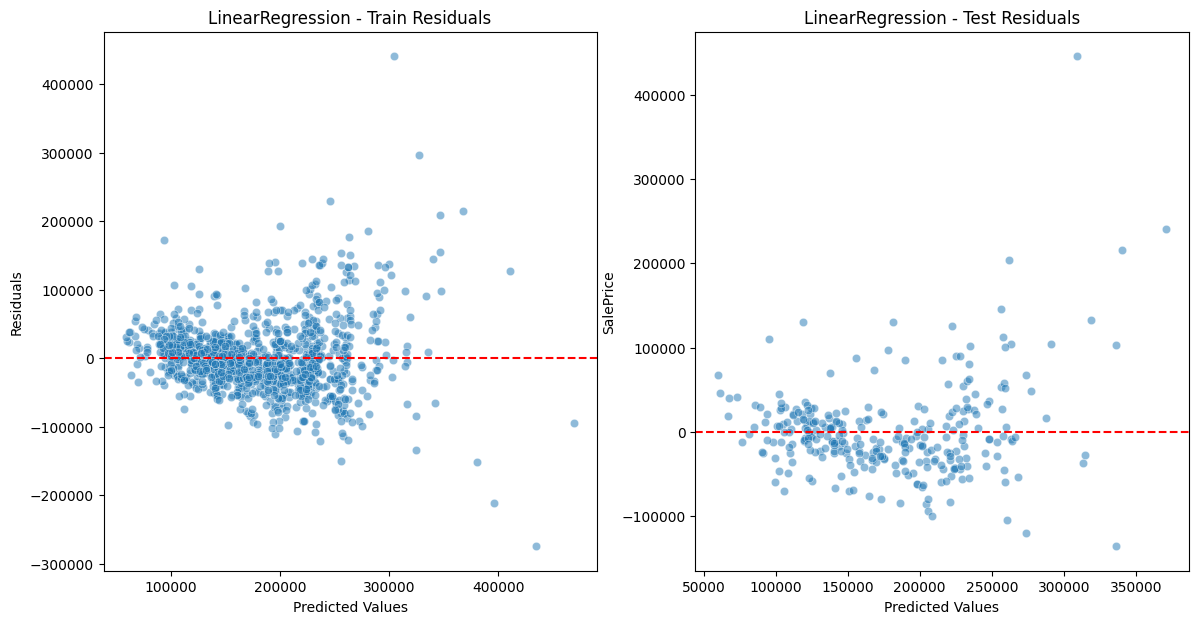

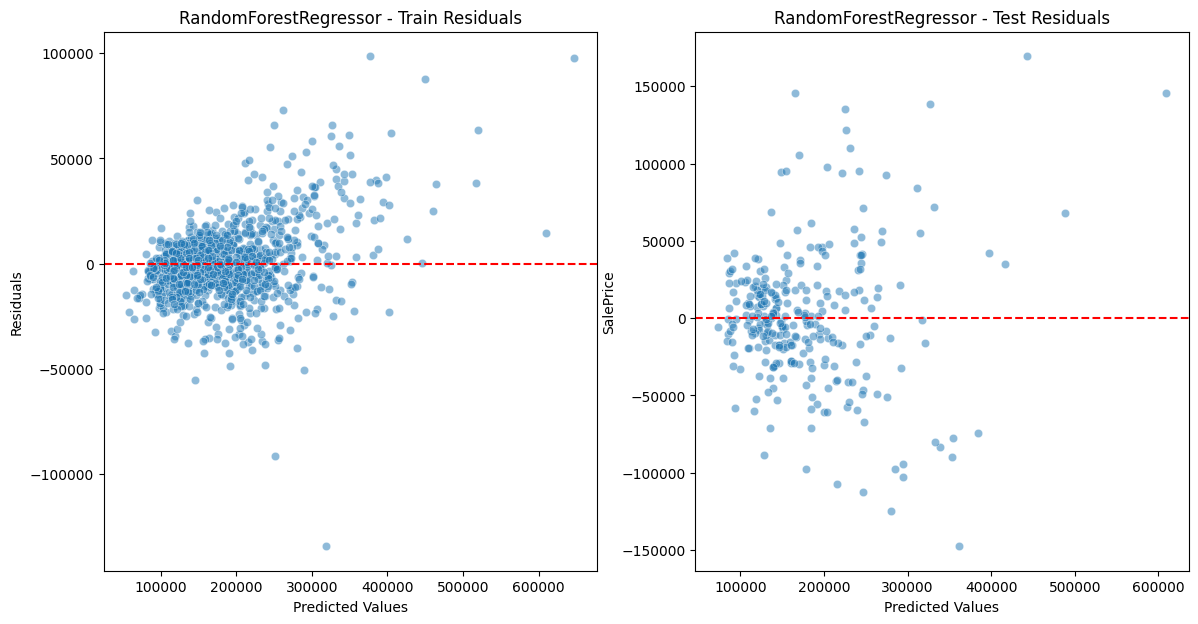

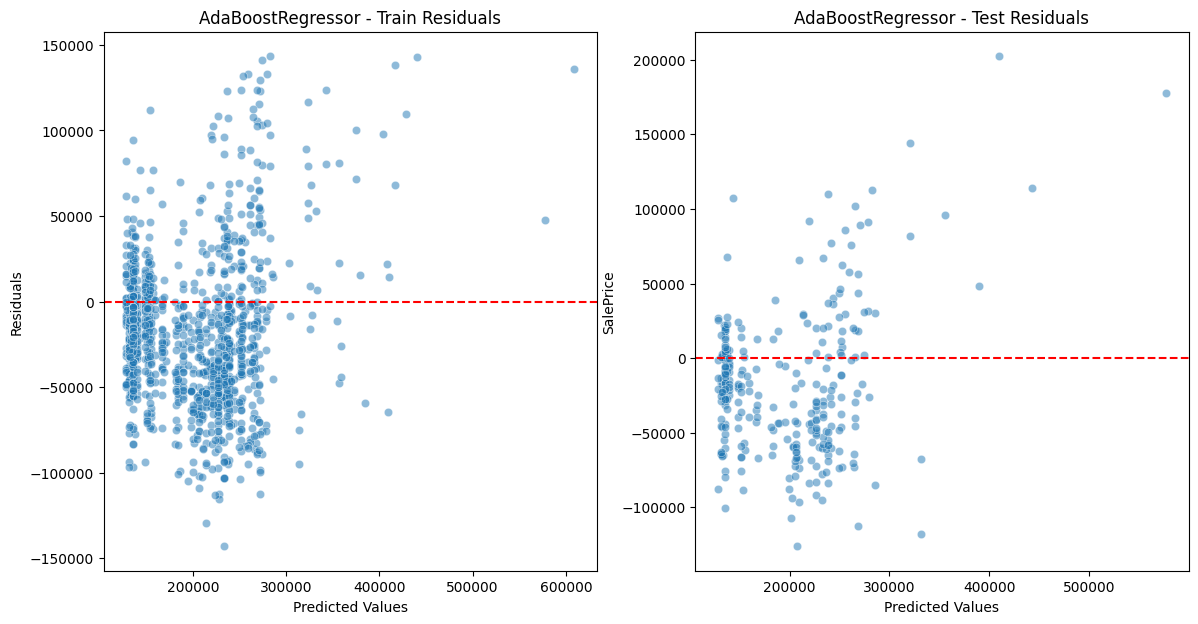

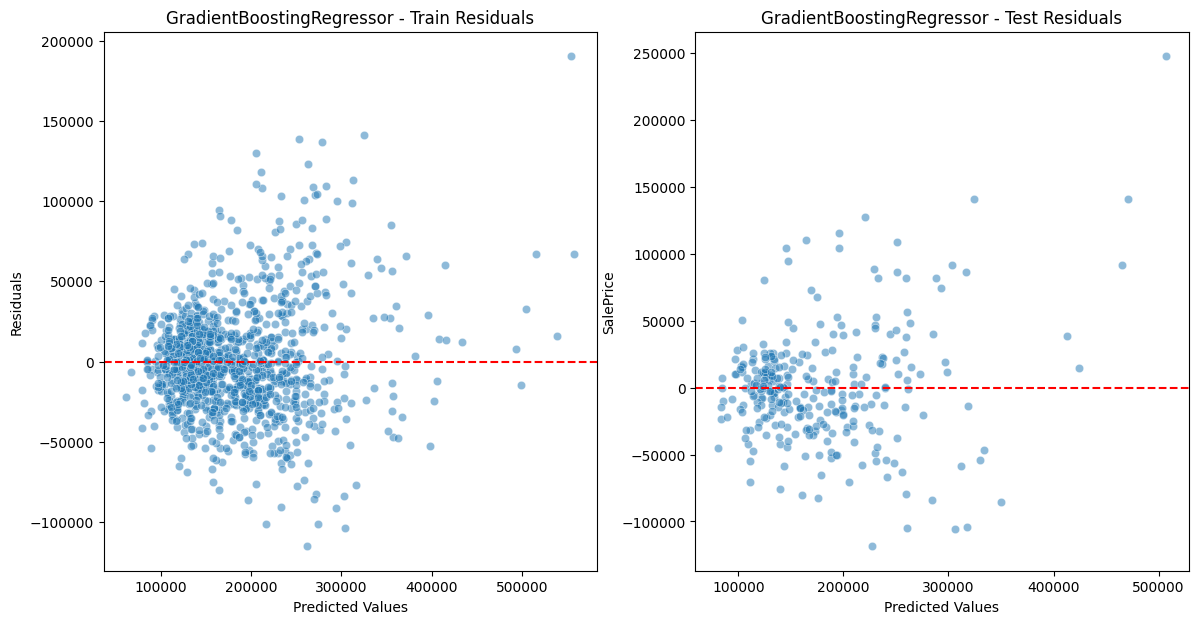

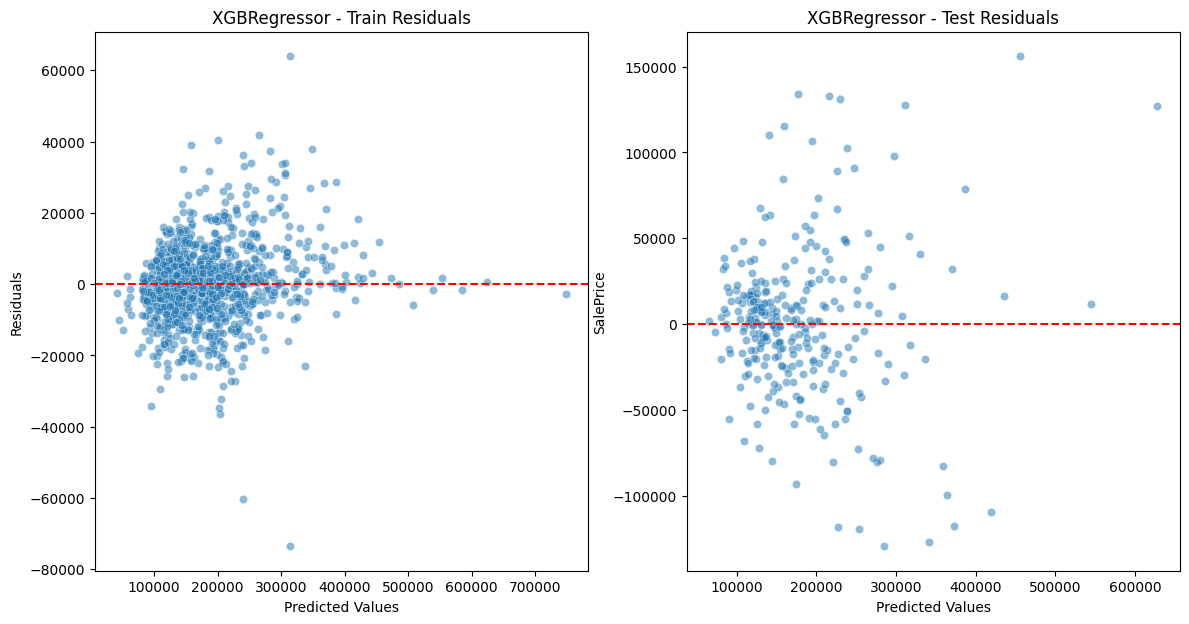

In [81]:
def plot_residuals(models, X_train, X_test, y_train, y_test):
    for model in models:
        # Fit model
        model.fit(X_train, y_train)
        # Get predictions
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        # Calculate residuals
        train_residuals = y_train - train_predictions
        test_residuals = y_test - test_predictions
        
        # Plotting
        plt.figure(figsize=(14, 7))

        # Train residuals
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=train_predictions, y=train_residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'{type(model).__name__} - Train Residuals')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')

        # Test residuals
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=test_predictions, y=test_residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'{type(model).__name__} - Test Residuals')
        plt.xlabel('Predicted Values')

        plt.show()

# Plot residuals for all models
plot_residuals(models_to_evaluate, X_train_scaled_df, X_test_scaled, y_train, y_test)

In [82]:

import joblib

# save the model
joblib.dump(linear_regression_model,'linear_regression_model.joblib')

# save the scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [83]:
import gradio as gr

In [84]:
import gradio as gr

import joblib

# Load the trained model and scaler objects from file
model = joblib.load('linear_regression_model.joblib')
scaler = joblib.load('scaler.joblib')

# Define the prediction function
def predict_price(LotArea, YearBuilt, FullBath, BedroomAbvGr, TotRmsAbvGrd):
    # Create a numpy array from the inputs
    featuress = np.array([[LotArea, YearBuilt, FullBath, BedroomAbvGr, TotRmsAbvGrd]])
    
    # Scale the features using the loaded scaler
    features_scaled = scaler.transform(featuress)
    
    # Make a prediction
    prediction = model.predict(features_scaled)
    
    # Return the prediction
    return {'Price': prediction[0]}



In [85]:
LotArea= int(input("Enter LotArea : "))
YearBuilt= int(input("Enter Year Built : "))
FullBath= int(input("Enter Full Bath : "))
BedroomAbvGr= int(input("Enter Bedrooms Above Grade : "))
TotRmsAbvGrd= int(input("Enter Total Rooms Above Grade : "))
Price=predict_price(LotArea,YearBuilt,FullBath,BedroomAbvGr,TotRmsAbvGrd)
print(f"LotArea : {LotArea} \nYear Built : {YearBuilt} \nFull Bath : {FullBath} \nBedroom Abv Gr : {BedroomAbvGr} \nTotal Rooms Abv Gr : {TotRmsAbvGrd} ")
print("House Price Prediction : " , Price)

LotArea : 90000 
Year Built : 2024 
Full Bath : 2 
Bedroom Abv Gr : 4 
Total Rooms Abv Gr : 8 
House Price Prediction :  {'Price': 349871.34601229517}


d:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
